In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.utils import resample
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor  # LightGBM model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from catboost import CatBoostRegressor
import joblib
import os
from datetime import datetime

In [2]:
from sklearn.metrics import mean_squared_error


In [3]:
from sales_logger import logger


2024-11-03 11:21:24,445 - sales_prediction_logger - INFO - This is an INFO message.
2024-11-03 11:21:24,448 - sales_prediction_logger - WARNING - This is a WARNING message.
2024-11-03 11:21:24,449 - sales_prediction_logger - ERROR - This is an ERROR message.
2024-11-03 11:21:24,451 - sales_prediction_logger - CRITICAL - This is a CRITICAL message.


In [4]:
logger.info("Starting data processing.")

# Your data processing code here

try:
    # Example computation
    result = 10 / 0  # This will raise a ZeroDivisionError
except ZeroDivisionError as e:
    logger.error("An error occurred: %s", e)

logger.info("Data processing completed.")


2024-11-03 11:21:25,812 - sales_prediction_logger - INFO - Starting data processing.
2024-11-03 11:21:25,815 - sales_prediction_logger - ERROR - An error occurred: division by zero
2024-11-03 11:21:25,818 - sales_prediction_logger - INFO - Data processing completed.


In [5]:
logger.info("Starting data processing.")

# Your data processing code here
data = [1, 2, 3]  # Example data

logger.debug("Data: %s", data)  # This will log the data


2024-11-03 11:21:29,741 - sales_prediction_logger - INFO - Starting data processing.


In [6]:
df_train = pd.read_csv('df_train.csv')
df_test= pd.read_csv('test.csv')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14592\2158010631.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv('df_train.csv')


In [7]:
df_train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9,2008,0,0,0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11,2007,1,13,2010,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12,2006,1,14,2011,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9,2009,0,0,0,0
4,6,5,2015-07-31,5651,589,1,1,0,1,a,a,310.0,12,2013,0,0,0,0


In [8]:
df_train.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
927984,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6,2014,1,31,2013,"Jan,Apr,Jul,Oct"
927985,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4,2006,0,0,0,0
927986,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,9,2013,0,0,0,0
927987,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,9,2013,0,0,0,0
927988,1115,2,2013-01-01,0,0,0,0,a,1,d,c,5350.0,9,2014,1,22,2012,"Mar,Jun,Sept,Dec"


In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 927989 entries, 0 to 927988
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Store                      927989 non-null  int64  
 1   DayOfWeek                  927989 non-null  int64  
 2   Date                       927989 non-null  object 
 3   Sales                      927989 non-null  int64  
 4   Customers                  927989 non-null  int64  
 5   Open                       927989 non-null  int64  
 6   Promo                      927989 non-null  int64  
 7   StateHoliday               927989 non-null  object 
 8   SchoolHoliday              927989 non-null  int64  
 9   StoreType                  927989 non-null  object 
 10  Assortment                 927989 non-null  object 
 11  CompetitionDistance        927989 non-null  float64
 12  CompetitionOpenSinceMonth  927989 non-null  int64  
 13  CompetitionOpenSinceYear   92

In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date           41088 non-null  object 
 4   Open           41077 non-null  float64
 5   Promo          41088 non-null  int64  
 6   StateHoliday   41088 non-null  object 
 7   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB


In [11]:
df_train["StateHoliday"].value_counts()


StateHoliday
0    538588
0    360448
a     18903
b      6227
c      3823
Name: count, dtype: int64

In [12]:
df_train['StateHoliday'] = df_train['StateHoliday'].astype(str)

In [13]:
df_train.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [14]:
df_test.columns

Index(['Id', 'Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday'],
      dtype='object')

In [15]:
df_train["PromoInterval"].value_counts()

PromoInterval
0                   438044
Jan,Apr,Jul,Oct     281507
Feb,May,Aug,Nov     115263
Mar,Jun,Sept,Dec     93175
Name: count, dtype: int64

In [16]:
df_train["CompetitionDistance"].isnull().sum()

0

In [17]:
df_train['Date'] = pd.to_datetime(df_train['Date'])
df_test['Date'] = pd.to_datetime(df_test['Date'])

In [18]:
##adding features:

# Weekday (0 = Monday, 6 = Sunday)
df_train['Weekday'] = df_train['Date'].dt.weekday

In [19]:
# Weekday (0 = Monday, 6 = Sunday)
df_test['Weekday'] = df_test['Date'].dt.weekday

In [20]:
 # Weekend indicator
df_train['IsWeekend'] = df_train['Weekday'].isin([5, 6]).astype(int)  # 5 = Saturday, 6 = Sunday
df_test['IsWeekend'] = df_test['Weekday'].isin([5, 6]).astype(int)  # 5 = Saturday, 6 = Sunday


In [21]:
# Holiday indicators
df_train['IsStateHoliday'] = df_train['StateHoliday'].apply(lambda x: 1 if x != '0' else 0)
df_train['IsSchoolHoliday'] = df_train['SchoolHoliday'].astype(int)  # Convert to int directly

In [22]:
# Holiday indicators
df_test['IsStateHoliday'] = df_test['StateHoliday'].apply(lambda x: 1 if x != '0' else 0)
df_test['IsSchoolHoliday'] = df_test['SchoolHoliday'].astype(int)  # Convert to int directly

In [23]:
# Combine holiday indicators
df_train['IsHoliday'] = df_train['IsStateHoliday'] | df_train['IsSchoolHoliday']
df_test['IsHoliday'] = df_test['IsStateHoliday'] | df_test['IsSchoolHoliday']

In [24]:
df_train['IsBeginningOfMonth'] = df_train['Date'].dt.day <= 7
df_train['IsMidMonth'] = (df_train['Date'].dt.day > 7) & (df_train['Date'].dt.day <= 14)
df_train['IsEndOfMonth'] = df_train['Date'].dt.day > (df_train['Date'].dt.days_in_month - 7)


In [25]:
df_test['IsBeginningOfMonth'] = df_test['Date'].dt.day <= 7
df_test['IsMidMonth'] = (df_test['Date'].dt.day > 7) & (df_train['Date'].dt.day <= 14)
df_test['IsEndOfMonth'] = df_test['Date'].dt.day > (df_test['Date'].dt.days_in_month - 7)


In [26]:
##more additional features:

df_train['Quarter'] = df_train['Date'].dt.quarter
df_train['Year'] = df_train['Date'].dt.year
df_train['Month'] = df_train['Date'].dt.month
df_train['Day'] = df_train['Date'].dt.day

In [27]:
df_train.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Weekday', 'IsWeekend',
       'IsStateHoliday', 'IsSchoolHoliday', 'IsHoliday', 'IsBeginningOfMonth',
       'IsMidMonth', 'IsEndOfMonth', 'Quarter', 'Year', 'Month', 'Day'],
      dtype='object')

In [28]:
df_test.columns

Index(['Id', 'Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'Weekday', 'IsWeekend', 'IsStateHoliday',
       'IsSchoolHoliday', 'IsHoliday', 'IsBeginningOfMonth', 'IsMidMonth',
       'IsEndOfMonth'],
      dtype='object')

In [29]:
df_train['Open'].unique()

array([1, 0], dtype=int64)

In [30]:
df_test['Open'].unique()

array([ 1., nan,  0.])

In [31]:
# Calculate the mode of the 'Open' column
mode_value = df_test['Open'].mode()[0]

# Fill missing values with the mode
df_test['Open'].fillna(mode_value, inplace=True)

# Convert the 'Open' column to integer
df_test['Open'] = df_test['Open'].astype(int)

# Verify the transformation and value counts
print(df_test['Open'].value_counts())


Open
1    35104
0     5984
Name: count, dtype: int64


In [32]:
# Get the columns present in both df_train and df_test
common_columns = df_train.columns.intersection(df_test.columns)

# Drop the columns not present in df_test from df_train
df_train_filtered = df_train[common_columns]

# Now df_train_filtered contains only the columns common to both df_train and df_test
print("Filtered columns in df_train:", df_train_filtered.columns)

Filtered columns in df_train: Index(['Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'Weekday', 'IsWeekend', 'IsStateHoliday',
       'IsSchoolHoliday', 'IsHoliday', 'IsBeginningOfMonth', 'IsMidMonth',
       'IsEndOfMonth'],
      dtype='object')


In [33]:
df_train_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 927989 entries, 0 to 927988
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Store               927989 non-null  int64         
 1   DayOfWeek           927989 non-null  int64         
 2   Date                927989 non-null  datetime64[ns]
 3   Open                927989 non-null  int64         
 4   Promo               927989 non-null  int64         
 5   StateHoliday        927989 non-null  object        
 6   SchoolHoliday       927989 non-null  int64         
 7   Weekday             927989 non-null  int32         
 8   IsWeekend           927989 non-null  int32         
 9   IsStateHoliday      927989 non-null  int64         
 10  IsSchoolHoliday     927989 non-null  int32         
 11  IsHoliday           927989 non-null  int64         
 12  IsBeginningOfMonth  927989 non-null  bool          
 13  IsMidMonth          927989 no

In [34]:
df_train_filtered.to_csv("df_train_filtered.csv", index=False)

In [40]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Id                  41088 non-null  int64         
 1   Store               41088 non-null  int64         
 2   DayOfWeek           41088 non-null  int64         
 3   Date                41088 non-null  datetime64[ns]
 4   Open                41088 non-null  int32         
 5   Promo               41088 non-null  int64         
 6   StateHoliday        41088 non-null  object        
 7   SchoolHoliday       41088 non-null  int64         
 8   Weekday             41088 non-null  int32         
 9   IsWeekend           41088 non-null  int32         
 10  IsStateHoliday      41088 non-null  int64         
 11  IsSchoolHoliday     41088 non-null  int32         
 12  IsHoliday           41088 non-null  int64         
 13  IsBeginningOfMonth  41088 non-null  bool      

In [46]:
# Save the DataFrame to a specific directory
df_test.to_csv('output_file.csv', columns=['Date',  'IsHoliday', 'IsWeekend',  'Promo'], index=False)


In [34]:
# LabelEncoding
le = LabelEncoder()

# Encoding to 'StateHoliday' column in both df_train and df_test
df_train_filtered['StateHoliday'] = le.fit_transform(df_train_filtered['StateHoliday'].astype(str))
df_test['StateHoliday'] = le.transform(df_test['StateHoliday'].astype(str))

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11212\3580741570.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_filtered['StateHoliday'] = le.fit_transform(df_train_filtered['StateHoliday'].astype(str))


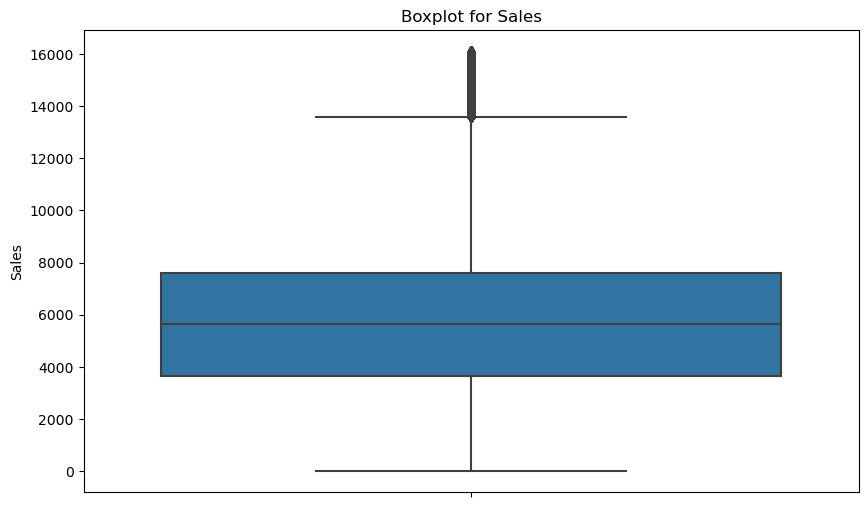

Number of outliers in Sales column: 812
Number of outliers detected by IQR in Sales column: 9545


In [33]:
# Importing necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

# Assuming `df_train` contains the `Sales` column

# Visualize with a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(y=df_train['Sales'])
plt.title('Boxplot for Sales')
plt.show()

# Using Z-score to detect outliers
z_scores_sales = np.abs(stats.zscore(df_train['Sales']))

# Identifying outliers based on Z-score (Z > 3 considered outliers)
outliers_sales = np.where(z_scores_sales > 3)

print(f"Number of outliers in Sales column: {len(outliers_sales[0])}")

# Using IQR method
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Detecting outliers in Sales using IQR
outliers_iqr_sales = detect_outliers_iqr(df_train, 'Sales')
print(f"Number of outliers detected by IQR in Sales column: {len(outliers_iqr_sales)}")


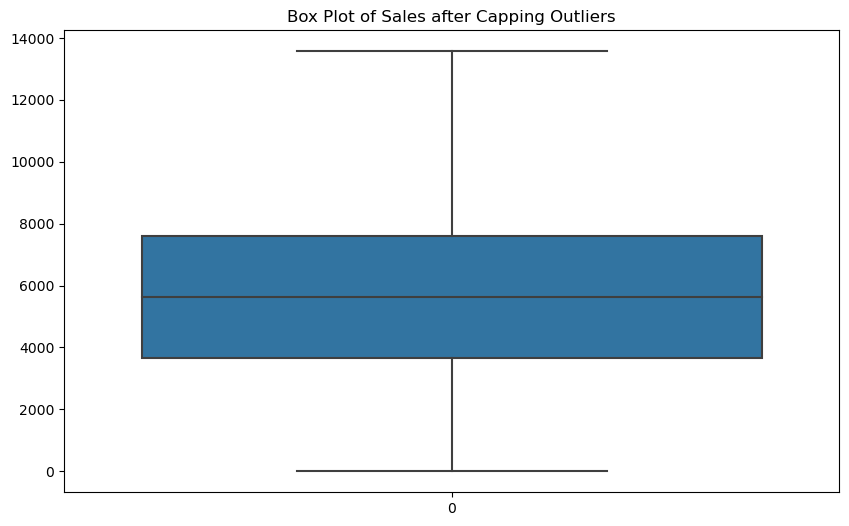

In [34]:
# Capping the outliers using IQR
Q1 = df_train['Sales'].quantile(0.25)
Q3 = df_train['Sales'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap the 'Sales' column values at the calculated bounds
df_train_capped = df_train.copy()
df_train_capped['Sales'] = np.where(df_train_capped['Sales'] > upper_bound, upper_bound, 
                                    np.where(df_train_capped['Sales'] < lower_bound, lower_bound, df_train_capped['Sales']))

# Plotting the box plot after capping the outliers
plt.figure(figsize=(10, 6))
sns.boxplot(df_train_capped['Sales'])
plt.title('Box Plot of Sales after Capping Outliers')
plt.show()


In [35]:
# Define features and target
X_train = df_train_filtered.drop(columns=['Date'])  # Replace 'Sales' with your target column
y_train = df_train_capped['Sales']

# Define models to evaluate
models = {
    'RandomForest': RandomForestRegressor(random_state=42),
    'GradientBoosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42),
    'LightGBM': LGBMRegressor(random_state=42),
    'CatBoost': CatBoostRegressor(silent=True, random_state=42),
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet()
}


# Loop through each model
for model_name, model in models.items():
    # Create a pipeline for preprocessing and model fitting
    pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler()),
        ('model', model)
    ])
    
    # Train the model on the training data
    pipeline.fit(X_train, y_train)
    
    # Optionally, print out the model name and a confirmation of training
    print(f'{model_name} trained successfully.')

RandomForest trained successfully.
GradientBoosting trained successfully.
XGBoost trained successfully.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.143306 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 360
[LightGBM] [Info] Number of data points in the train set: 927989, number of used features: 18
[LightGBM] [Info] Start training from score 5453.445662
LightGBM trained successfully.
CatBoost trained successfully.
LinearRegression trained successfully.
Ridge trained successfully.
Lasso trained successfully.
ElasticNet trained successfully.


In [36]:
# Split the training data into training and validation sets
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Loop through each model
for model_name, model in models.items():
    # Create a pipeline for preprocessing and model fitting
    pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler()),
        ('model', model)
    ])
    
    # Train the model on the training data
    pipeline.fit(X_train_split, y_train_split)
    
    # Make predictions on the validation data
    y_pred = pipeline.predict(X_val_split)
    
    # Evaluate model performance
    mae = mean_absolute_error(y_val_split, y_pred)
    mse = mean_squared_error(y_val_split, y_pred)
    r2 = r2_score(y_val_split, y_pred)
    
    # Print evaluation metrics
    print(f'\n{model_name} Performance:')
    print(f'Mean Absolute Error (MAE): {mae:.2f}')
    print(f'Mean Squared Error (MSE): {mse:.2f}')
    print(f'R-Squared (R²): {r2:.2f}')



RandomForest Performance:
Mean Absolute Error (MAE): 858.46
Mean Squared Error (MSE): 1882312.08
R-Squared (R²): 0.83

GradientBoosting Performance:
Mean Absolute Error (MAE): 1368.49
Mean Squared Error (MSE): 3561929.20
R-Squared (R²): 0.69

XGBoost Performance:
Mean Absolute Error (MAE): 1253.06
Mean Squared Error (MSE): 3045071.97
R-Squared (R²): 0.73
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.138334 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 360
[LightGBM] [Info] Number of data points in the train set: 742391, number of used features: 18
[LightGBM] [Info] Start training from score 5451.758933

LightGBM Performance:
Mean Absolute Error (MAE): 1274.94
Mean Squared Error (MSE): 3160205.84
R-Squared (R²): 0.72

CatBoost Performance:
Mean Absolute Error (MAE): 1231.03
Mean Squared Error (MSE): 2968352.83
R-Squared (R²): 0.74



In [37]:
# Drop 'Customers' from the training set if not present in test set
X_train = df_train_filtered.drop(columns=['Date'])  
X_test = df_test.drop(columns=['Id', 'Date'])  # Drop 'Id' and 'Date' for prediction

# Assuming df_test has no 'Sales' column but the same feature columns as X_train except 'Date'
X_test = df_test.drop(columns=['Id', 'Date'])  # Drop 'Id' and 'Date' for prediction

# Create a dictionary to store predictions from each model
predictions = {}

# Loop through each model
for model_name, model in models.items():
    # Create a pipeline for preprocessing and model fitting
    pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler()),
        ('model', model)
    ])
    
    # Train the model on the full training data
    pipeline.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_test_pred = pipeline.predict(X_test)
    
    # Store predictions in the dictionary
    predictions[model_name] = y_test_pred
    
    # Optionally, print a confirmation
    print(f'{model_name} test predictions made successfully.')

RandomForest test predictions made successfully.
GradientBoosting test predictions made successfully.
XGBoost test predictions made successfully.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.092196 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 360
[LightGBM] [Info] Number of data points in the train set: 927989, number of used features: 18
[LightGBM] [Info] Start training from score 5453.445662
LightGBM test predictions made successfully.
CatBoost test predictions made successfully.
LinearRegression test predictions made successfully.
Ridge test predictions made successfully.
Lasso test predictions made successfully.
ElasticNet test predictions made successfully.


In [43]:
def get_timestamp():
    return datetime.now().strftime("%Y%m%d_%H%M%S")

# Specify the directory where you want to save the models
save_dir = "path_to_save_directory"  # Replace with your desired path

# Ensure the directory exists, and if not, create it
os.makedirs(save_dir, exist_ok=True)

# Testing saving the model without the pipeline
for model_name, model in models.items():
    model_filename = f"{model_name}_{get_timestamp()}.pkl"
    model_filepath = os.path.join(save_dir, model_filename)
    
    # Try saving just the model first
    try:
        joblib.dump(model, model_filepath)
        print(f'Model {model_name} saved as {model_filename}')
    except Exception as e:
        print(f'Failed to save {model_name}: {e}')


Model RandomForest saved as RandomForest_20241020_191619.pkl
Model GradientBoosting saved as GradientBoosting_20241020_191711.pkl
Model XGBoost saved as XGBoost_20241020_191711.pkl
Model LightGBM saved as LightGBM_20241020_191712.pkl
Model CatBoost saved as CatBoost_20241020_191712.pkl
Model LinearRegression saved as LinearRegression_20241020_191712.pkl
Model Ridge saved as Ridge_20241020_191712.pkl
Model Lasso saved as Lasso_20241020_191712.pkl
Model ElasticNet saved as ElasticNet_20241020_191712.pkl


In [3]:
# Load the saved RandomForest model and assign it to best_model
best_model = joblib.load(r'C:\Users\Lenovo\Desktop\PROJECT 6\path_to_save_directory\RandomForest_20241020_191619.pkl')


In [41]:
X_train = df_train_filtered.drop(columns=['Date'])

In [42]:
# Extract feature importance from the Random Forest model
feature_importances = best_model.feature_importances_

# Create a DataFrame for easy plotting
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

In [43]:
feature_importance_df

,Feature,Importance
2,Open,0.557159
0,Store,0.287248
3,Promo,0.078805
17,Day,0.018747
16,Month,0.016034
6,Weekday,0.013976
1,DayOfWeek,0.012520
15,Year,0.004466
14,Quarter,0.002768
7,IsWeekend,0.002070


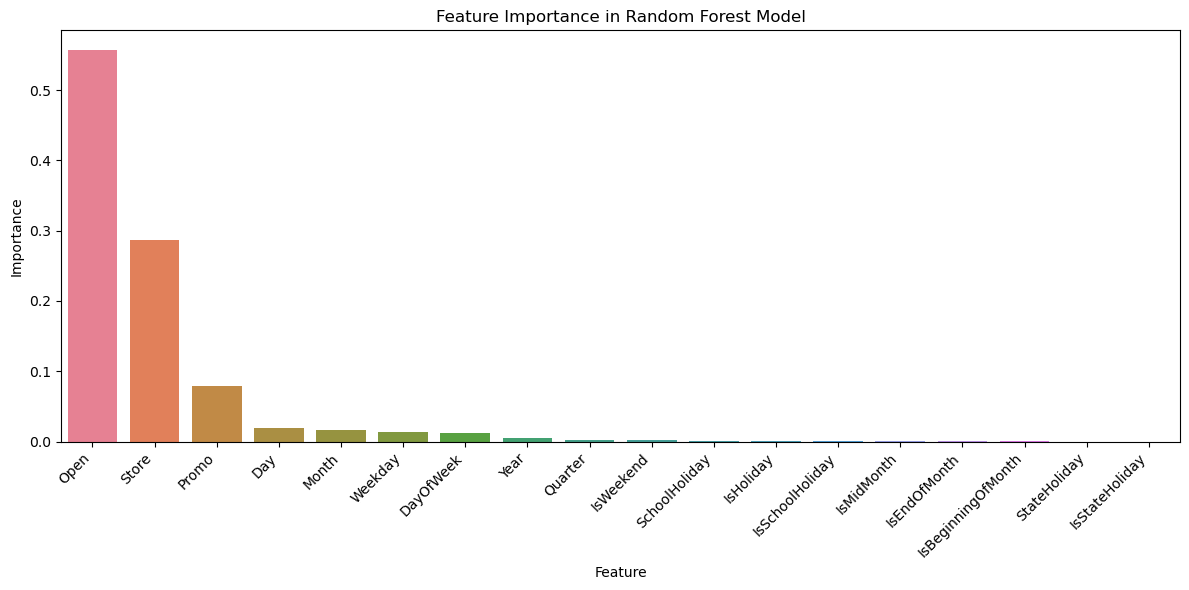

In [41]:

plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importance_df['Feature'], y=feature_importance_df['Importance'], palette="husl")

# Add labels and title
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance in Random Forest Model')

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


In [44]:
feature_importance_df.head()

,Feature,Importance
2,Open,0.557159
0,Store,0.287248
3,Promo,0.078805
17,Day,0.018747
16,Month,0.016034
